In [39]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cupy as cp

In [25]:
aia_df=pd.read_pickle('..\\aia_ops\\data\\aia.pkl')

## how to use timeit

In [19]:
%%timeit

import numpy as np

n=100000
a = np.arange(n)
np.sum(a)

100 µs ± 17.2 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [15]:
n=100000
a = np.arange(n)
%timeit np.sum(a) 

36.8 µs ± 7.56 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


## reading a large df in main  vs reading it in a function

definitly reading a large df in main then passing it to a function is faster than reading it in the function itself

## Numpy vs Cupy

In [37]:
a=aia_df.loc[0,'image']
print(a.shape, a.dtype)

(2048, 2048) float16


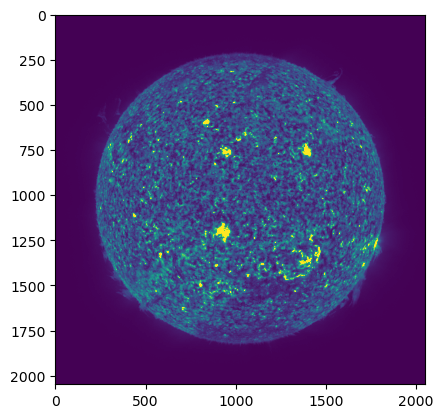

In [28]:
plt.imshow(a,vmax=200)

In [72]:
np.asarray(a,dtype=np.float64)

array([[3.30162048e-03, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 4.72412109e-01, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 1.18652344e-01, ...,
        9.05990601e-04, 6.36577606e-05, 4.47034836e-06],
       ...,
       [0.00000000e+00, 3.57627869e-07, 4.70876694e-06, ...,
        0.00000000e+00, 1.19209290e-07, 3.57627869e-07],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [74]:
%%timeit

b=np.asarray(a,dtype=np.float64)
np.nansum(b)

42.2 ms ± 4.79 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [76]:
b=np.asarray(a,dtype=np.float64)
np.nansum(b)

112381044.91983932

In [80]:
%%timeit
b=np.asarray(a,dtype=np.float64)
b=cp.asarray(b)
cp.nansum(b)

24.6 ms ± 2.58 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [83]:
# so generally speaking, numpy is just the same as cupy by timeit test

In [82]:
b=np.asarray(a,dtype=np.float64)
b=cp.asarray(b)
cp.nansum(b)

array(1.12381045e+08)

In [65]:
b

array([[3.3016e-03, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [0.0000e+00, 4.7241e-01, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [0.0000e+00, 0.0000e+00, 1.1865e-01, ..., 9.0599e-04, 6.3658e-05,
        4.4703e-06],
       ...,
       [0.0000e+00, 3.5763e-07, 4.7088e-06, ..., 0.0000e+00, 1.1921e-07,
        3.5763e-07],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00]], dtype=float16)

Array size: 1000000
NumPy average sum time: 0.000972 seconds
CuPy average sum time: 0.001201 seconds

Array size: 2000000
NumPy average sum time: 0.001701 seconds
CuPy average sum time: 0.002246 seconds

Array size: 4000000
NumPy average sum time: 0.002270 seconds
CuPy average sum time: 0.002926 seconds

Array size: 16000000
NumPy average sum time: 0.010699 seconds
CuPy average sum time: 0.013394 seconds



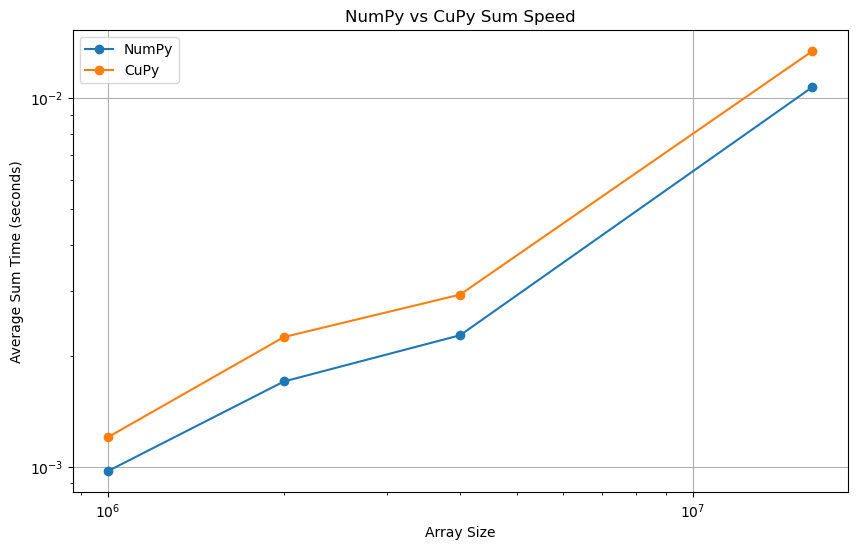

In [57]:
import numpy as np
import cupy as cp
import time

# Define the array sizes and the number of repetitions for each size
array_sizes = [10**6,2*10**6,4*10**6,16*10**6]
repetitions = 50

# Initialize lists to store average times
numpy_times = []
cupy_times = []

# Function to calculate the average time for summation using NumPy
def numpy_sum_speed(arr_size, repetitions):
    times = []
    for _ in range(repetitions):
        array = np.random.rand(arr_size).astype(np.float32)
        start_time = time.time()
        np.sum(array)
        times.append(time.time() - start_time)
    return np.mean(times)

# Function to calculate the average time for summation using CuPy
def cupy_sum_speed(arr_size, repetitions):
    times = []
    for _ in range(repetitions):
        array = np.random.rand(arr_size).astype(cp.float32)
        start_time = time.time()
        array=cp.asarray(array)
        cp.sum(array)
        times.append(time.time() - start_time)
    return np.mean(times)

# Test summation speed for each array size using NumPy and CuPy
for size in array_sizes:
    numpy_times.append(numpy_sum_speed(size, repetitions))
    cupy_times.append(cupy_sum_speed(size, repetitions))

# Print the results
for i, size in enumerate(array_sizes):
    print(f"Array size: {size}")
    print(f"NumPy average sum time: {numpy_times[i]:.6f} seconds")
    print(f"CuPy average sum time: {cupy_times[i]:.6f} seconds")
    print()

# Plotting the results
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(array_sizes, numpy_times, marker='o', label='NumPy')
plt.plot(array_sizes, cupy_times, marker='o', label='CuPy')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Array Size')
plt.ylabel('Average Sum Time (seconds)')
plt.title('NumPy vs CuPy Sum Speed')
plt.legend()
plt.grid(True)
plt.show()
